In [69]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [15]:
df = pandas.read_csv('binom_variant_call_metrics.csv')

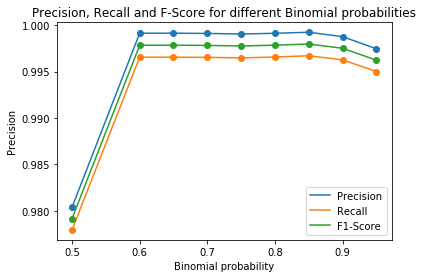

In [66]:
df_pr = df['Precision']
df_re = df['Recall']
df_fs = df['F1-Score']
df_bin = df['Binomial probability']
plt.plot(df_bin,df_pr,marker="o")
plt.plot(df_bin,df_re,marker="o")
plt.plot(df_bin,df_fs,marker="o")
plt.xlabel('Binomial probability')
plt.ylabel("Precision")
plt.title("Precision, Recall and F-Score for different Binomial probabilities")
plt.legend(lines[:3], labels[:3], loc='best')
plt.show()

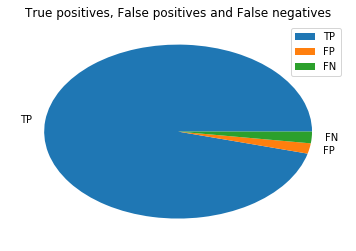

In [87]:
lab = ["TP", "FP", "FN"]
y = numpy.array([df['TP'][0], df['FP'][0], df['FN'][0]])
plt.title("True positives, False positives and False negatives")
plt.pie(y, labels = lab)
plt.legend()
plt.show()